## Problem Statement:

Given a dataset of customer information, we have to predict that whether his or her claim will be approved or not.

## Data Overview

1. 'months_as_customer'
2. 'age'
3. 'policy_number'
4. 'policy_bind_date',
5. 'policy_state'
6. 'policy_csl'
7. 'policy_deductable',
8. 'policy_annual_premium', 
9. 'umbrella_limit', 
10. 'insured_zip', 
11. 'insured_sex',
12. insured_education_level', 
13. 'insured_occupation', 
14. 'insured_hobbies',
15. 'insured_relationship', 
16. 'capital-gains', 
17. 'capital-loss',
18. 'incident_date', 
19. 'incident_type', 
20. 'collision_type', 
21. 'incident_severity',
22. 'authorities_contacted', 
23. 'incident_state', 
24. 'incident_city',
25. 'incident_location', 
26. 'incident_hour_of_the_day',
27. 'number_of_vehicles_involved', 
28. 'property_damage', 
29. 'bodily_injuries',
30. 'witnesses', 
31. 'police_report_available', 
32. 'total_claim_amount',
33. 'injury_claim', 
34. 'property_claim', 
35. 'vehicle_claim', 
36. 'auto_make',
37. 'auto_model', 
38. 'auto_year', 
39. 'fraud_reported'

## Importing Libraries

In [478]:
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [479]:
#reading the dataset

df = pd.read_csv(r'insurance_claims.csv')
main_df = df.copy()
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [480]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

#### Size of the dataset

In [481]:
#size of the dataset

df.shape

(1000, 39)

In [482]:
#checking for the null values

df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [483]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [484]:
df.describe(include=object)

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,951,3,3,2,7,14,20,6,60,4,4,4,5,7,7,1000,3,3,14,39,2
top,8/5/1992,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,2/2/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,8822 Sky St,?,NO,Saab,RAM,N
freq,3,352,351,537,161,93,64,183,28,419,292,354,292,262,157,1,360,343,80,43,753


N    753
Y    247
Name: fraud_reported, dtype: int64
***********************************


<AxesSubplot:xlabel='fraud_reported'>

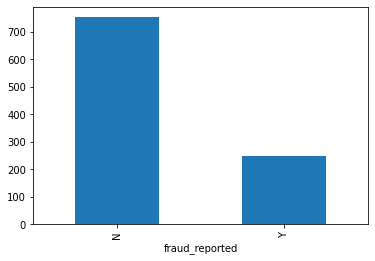

In [485]:
print(df['fraud_reported'].value_counts())
print("*"*35)
df.groupby("fraud_reported")['policy_number'].count().plot.bar()

<AxesSubplot:xlabel='insured_education_level'>

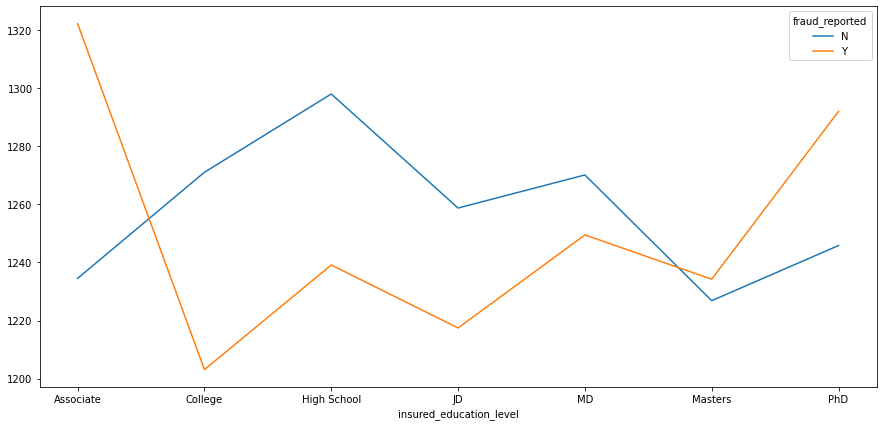

In [486]:
#Annual premium of education level policy_annual_premium

import matplotlib.pyplot as plt

# plot data
fig, ax = plt.subplots(figsize=(15,7))
df_avg_prem = df.groupby(['insured_education_level', 'fraud_reported']).mean()['policy_annual_premium']
df_avg_prem.unstack().plot(ax=ax)

<AxesSubplot:xlabel='insured_occupation'>

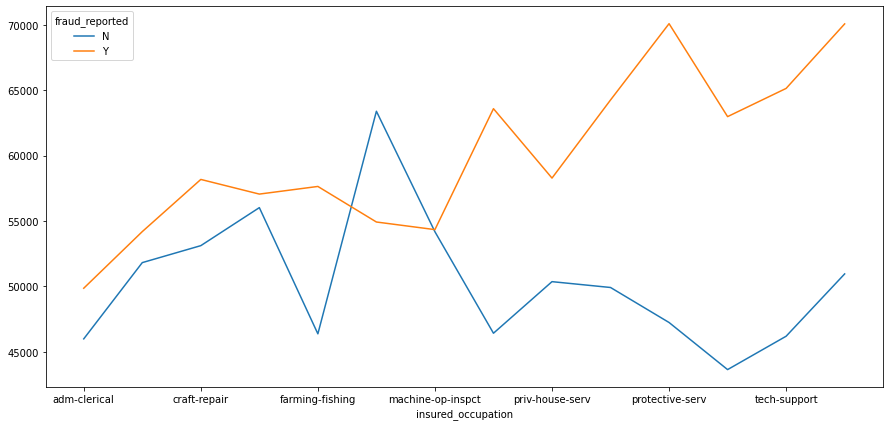

In [487]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['insured_occupation', 'fraud_reported']).mean()['total_claim_amount'].unstack().plot(ax=ax)

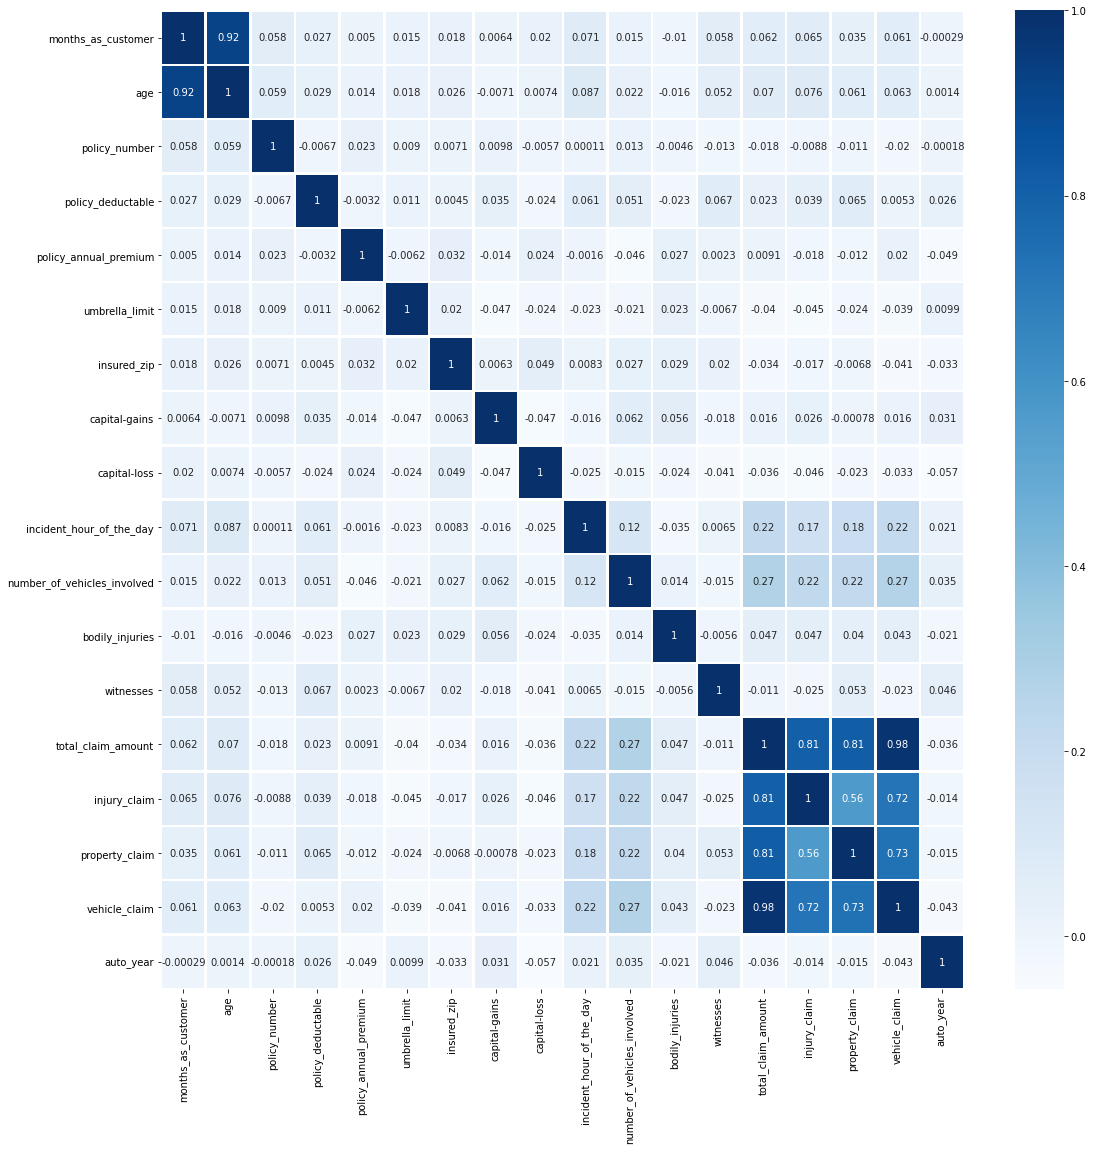

In [488]:
#correlation

plt.figure(figsize = (18,18))
ax = sns.heatmap(df.corr(),annot=True,cmap=plt.cm.Blues, linewidth=1.5)
plt.show()

In [489]:
#Remove Less Correlated Columns
deleteCols = ["policy_number", "policy_bind_date", "insured_zip", "incident_location", "incident_date"]
df = df.drop(deleteCols, axis=1)
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [490]:
#Handle Categorical Data

df.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available  

In [491]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [492]:
for column in df.columns:
    if(df[column].dtypes==object and column != 'fraud_reported'):
        print(df[column].value_counts())
        print("*"*30)
        print()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
******************************

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
******************************

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
******************************

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
******************************

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
******************************

reading           64
exercise          57
paintball         57
bungie-jumping    56
go

In [493]:
df['collision_type'] = df['collision_type'].replace(to_replace ="?", value ="Rear Collision") 
df['property_damage'] = df['property_damage'].replace(to_replace ="?", value ="NO")
df['police_report_available'] = df['police_report_available'].replace(to_replace ="?", value ="NO")

In [494]:
for column in df.columns:
    if(df[column].dtypes==object and column != 'fraud_reported'):
        print(df[column].value_counts())
        print("*"*30)
        print()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
******************************

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
******************************

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
******************************

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
******************************

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
******************************

reading           64
exercise          57
paintball         57
bungie-jumping    56
go

In [495]:
# label endcoding for the object datatypes
for col in df.columns:
    if (df[col].dtypes==object and col != 'fraud_reported'):
        le = preprocessing.LabelEncoder()
        le = le.fit(df[col])
        df[col] = le.transform(df[col])
        print('Completed Label encoding on',col)

Completed Label encoding on policy_state
Completed Label encoding on policy_csl
Completed Label encoding on insured_sex
Completed Label encoding on insured_education_level
Completed Label encoding on insured_occupation
Completed Label encoding on insured_hobbies
Completed Label encoding on insured_relationship
Completed Label encoding on incident_type
Completed Label encoding on collision_type
Completed Label encoding on incident_severity
Completed Label encoding on authorities_contacted
Completed Label encoding on incident_state
Completed Label encoding on incident_city
Completed Label encoding on property_damage
Completed Label encoding on police_report_available
Completed Label encoding on auto_make
Completed Label encoding on auto_model


In [496]:
#Binary encoder for output column
df['fraud_reported'] = df['fraud_reported'].map( {'Y':1, 'N':0})

df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2,1,1000,1406.91,0,1,4,2,17,0,53300,0,2,2,0,4,4,1,5,1,1,1,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,1,1,4,5,5,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,2,0,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,1,1,4,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,0,1,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,5,1,0,1,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,0,2,1000,1583.91,6000000,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009,0


# Model Training

In [497]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

y = df['fraud_reported']
x = df.drop(['fraud_reported'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.25, random_state=42)

In [498]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_train = ss.fit_transform(x_train)

x_test = ss.transform(x_test)


In [499]:
type(x_test)

numpy.ndarray

## 1. KNN

In [500]:
from sklearn import neighbors

#K-Nearest Neighbors
print("KNN Score :")
KNNClassifier = neighbors.KNeighborsClassifier(n_neighbors=14, weights='uniform')
KNNClassifier.fit(X=x_train,y=y_train)
KNNClassifier.score(x_test,y_test)

KNN Score :


0.72

In [501]:
KNN_y_predicted = KNNClassifier.predict(x_test)
class_names = np.unique(np.array(y_test))
confusion_matrix(y_test, KNN_y_predicted)

array([[180,   3],
       [ 67,   0]], dtype=int64)

In [502]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

print(classification_report(y_test, KNN_y_predicted))

scores = cross_val_score(KNNClassifier, x, y, cv=10, scoring='accuracy')
knn_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % knn_accuracy)

              precision    recall  f1-score   support

           0       0.73      0.98      0.84       183
           1       0.00      0.00      0.00        67

    accuracy                           0.72       250
   macro avg       0.36      0.49      0.42       250
weighted avg       0.53      0.72      0.61       250

Cross-Validated Accuracy: 0.74


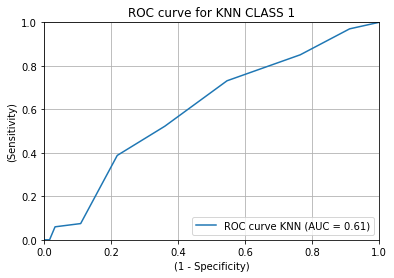

In [503]:
from sklearn.metrics import roc_curve, auc
knn_pred_prob = KNNClassifier.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, knn_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve KNN (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for KNN CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

## 2. Decision Tree

In [504]:
from sklearn import tree

#DecisionTree
DTClassifier = tree.DecisionTreeClassifier()
DTClassifier.fit(x_train, y_train) 

print("Decision Tree Score :")
DTClassifier.score(x_test,y_test)

Decision Tree Score :


0.736

In [505]:
DT_y_predicted = DTClassifier.predict(x_test)
class_names = np.unique(np.array(y_test))
confusion_matrix(y_test, DT_y_predicted)

array([[154,  29],
       [ 37,  30]], dtype=int64)

In [506]:
print(classification_report(y_test, DT_y_predicted))

scores = cross_val_score(DTClassifier, x, y, cv=10, scoring='accuracy')
dt_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % dt_accuracy)

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       183
           1       0.51      0.45      0.48        67

    accuracy                           0.74       250
   macro avg       0.66      0.64      0.65       250
weighted avg       0.73      0.74      0.73       250

Cross-Validated Accuracy: 0.78


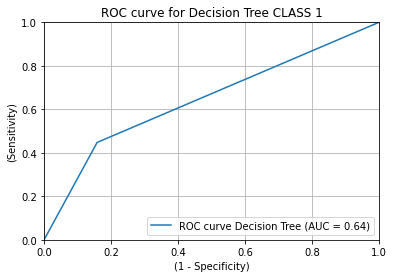

In [507]:
from sklearn.metrics import roc_curve, auc
dt_pred_prob = DTClassifier.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, dt_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve Decision Tree (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for Decision Tree CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

## 3. Support Vector Classifier

In [508]:
from sklearn.svm import SVC

#Support Vector Machine
SVMClassifier = SVC(kernel='rbf',probability=True,random_state=42, gamma='auto') 
SVMClassifier.fit(x_train, y_train) 
print("SVM Score :")
SVMClassifier.score(x_test,y_test)

SVM Score :


0.712

In [509]:
SVM_y_predicted = SVMClassifier.predict(x_test)
class_names = np.unique(np.array(y_test))
confusion_matrix(y_test, SVM_y_predicted)

array([[174,   9],
       [ 63,   4]], dtype=int64)

In [510]:
from sklearn.metrics import classification_report
report = classification_report(y_test, SVM_y_predicted)
print(report)

scores = cross_val_score(SVMClassifier, x, y, cv=10, scoring='accuracy')
svm_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % svm_accuracy)

              precision    recall  f1-score   support

           0       0.73      0.95      0.83       183
           1       0.31      0.06      0.10        67

    accuracy                           0.71       250
   macro avg       0.52      0.51      0.46       250
weighted avg       0.62      0.71      0.63       250

Cross-Validated Accuracy: 0.75


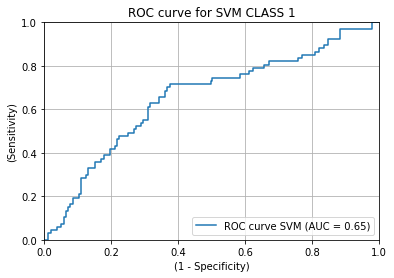

In [511]:
svm_pred_prob = SVMClassifier.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, svm_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve SVM (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for SVM CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

## 4. RandomClassifier

In [512]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#Random Forest
RFClassifier = RandomForestClassifier()
RFClassifier.fit(x_train, y_train) 
print("Random Forest Score :")
RFClassifier.score(x_test,y_test)

Random Forest Score :


0.74

In [513]:
RF_y_predicted = RFClassifier.predict(x_test)
class_names = np.unique(np.array(y_test))
confusion_matrix(y_test, RF_y_predicted)

array([[167,  16],
       [ 49,  18]], dtype=int64)

In [514]:
from sklearn.metrics import classification_report
report = classification_report(y_test, RF_y_predicted)
print(report)

scores = cross_val_score(RFClassifier, x, y, cv=10, scoring='accuracy')
rf_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % rf_accuracy)

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       183
           1       0.53      0.27      0.36        67

    accuracy                           0.74       250
   macro avg       0.65      0.59      0.60       250
weighted avg       0.71      0.74      0.71       250

Cross-Validated Accuracy: 0.78


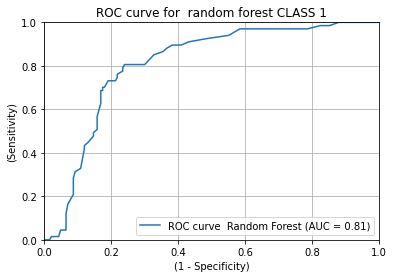

In [515]:
from sklearn.metrics import roc_curve, auc
rf_pred_prob = RFClassifier.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, rf_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve  Random Forest (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for  random forest CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

## 5. BalancedRandomClassifier

In [516]:
from imblearn.ensemble import BalancedRandomForestClassifier

#Balanced Random Forest
BRFClassifier=BalancedRandomForestClassifier()
BRFClassifier.fit(x_train, y_train) 
print("Balanced Random Forest Score :")
BRFClassifier.score(x_test,y_test)

Balanced Random Forest Score :


0.792

In [517]:
BRF_y_predicted = BRFClassifier.predict(x_test)
report = classification_report(y_test, BRF_y_predicted)
print(report)

scores = cross_val_score(BRFClassifier, x, y, cv=10, scoring='accuracy')
brf_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % brf_accuracy)

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       183
           1       0.59      0.73      0.65        67

    accuracy                           0.79       250
   macro avg       0.74      0.77      0.75       250
weighted avg       0.81      0.79      0.80       250

Cross-Validated Accuracy: 0.81


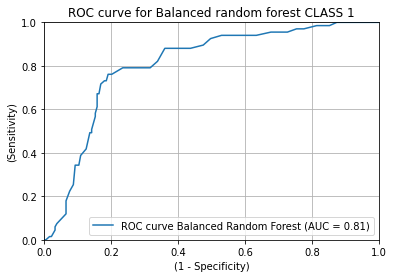

In [518]:
brf_pred_prob = BRFClassifier.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, brf_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve Balanced Random Forest (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for Balanced random forest CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

## 6. LinearDiscriminantAnalysis

In [519]:
#LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda.fit(x_train, y_train) 
print("Linear Discriminant Analysis Score :")
lda.score(x_test,y_test)

Linear Discriminant Analysis Score :


0.728

In [520]:
lda_y_predicted = lda.predict(x_test)
report = classification_report(y_test, lda_y_predicted)
print(report)

scores = cross_val_score(lda, x, y, cv=10, scoring='accuracy')
lda_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % lda_accuracy)

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       183
           1       0.49      0.28      0.36        67

    accuracy                           0.73       250
   macro avg       0.63      0.59      0.59       250
weighted avg       0.70      0.73      0.70       250

Cross-Validated Accuracy: 0.77


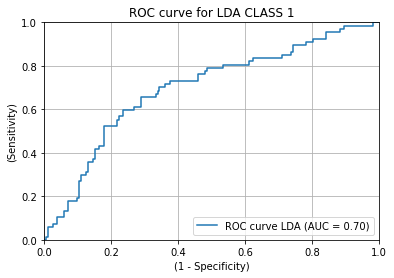

In [521]:
lda_pred_prob = lda.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, lda_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve LDA (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for LDA CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [522]:
explainer2 = lime.lime_tabular.LimeTabularExplainer(x_train, feature_names=feature_names, class_names=class_names, discretize_continuous=True)

In [523]:
# The Explainer Instance

exp = explainer2.explain_instance(x_test[6], lda.predict_proba, num_features=33, top_labels=1)

In [524]:
exp.show_in_notebook(show_table=True, show_all=False)

## 7. Naive Bayes

In [525]:
from sklearn.naive_bayes import BernoulliNB
#Naive Bayes Classifier

NBClassifier = BernoulliNB()
NBClassifier.fit(x_train, y_train)
print("Naive Bayes Classifier Score :")
NBClassifier.score(x_test,y_test)

Naive Bayes Classifier Score :


0.664

In [526]:
nb_y_predicted = NBClassifier.predict(x_test)
report = classification_report(y_test, nb_y_predicted)

print(report)

scores = cross_val_score(NBClassifier, x, y, cv=10, scoring='accuracy')
nb_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % nb_accuracy)

              precision    recall  f1-score   support

           0       0.73      0.87      0.79       183
           1       0.23      0.10      0.14        67

    accuracy                           0.66       250
   macro avg       0.48      0.49      0.47       250
weighted avg       0.59      0.66      0.62       250

Cross-Validated Accuracy: 0.80


## 8. XGBOOST

In [527]:
from xgboost import XGBClassifier

#XGBOOST Classifier
model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train, verbose=False) 
print("XGBClassifier Score :")
model_xgb.score(x_test,y_test)

XGBClassifier Score :


0.784

In [528]:
xgboost_y_predicted = model_xgb.predict(x_test)
report = classification_report(y_test, xgboost_y_predicted)

print(report)

scores = cross_val_score(model_xgb, x, y, cv=10, scoring='accuracy')
xgb_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % xgb_accuracy)

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       183
           1       0.61      0.55      0.58        67

    accuracy                           0.78       250
   macro avg       0.72      0.71      0.72       250
weighted avg       0.78      0.78      0.78       250

Cross-Validated Accuracy: 0.82


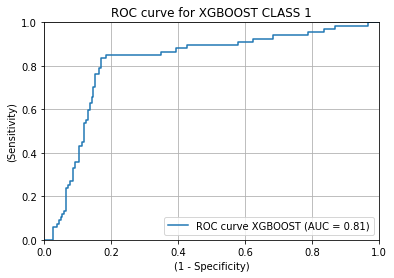

In [529]:
xgb_pred_prob = model_xgb.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, xgb_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve XGBOOST (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for XGBOOST CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [530]:
# Load our pkgs
import lime
import lime.lime_tabular

In [531]:
feature_names = ['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year']

In [532]:
class_names = [0, 1]

In [533]:
x_train

array([[-1.12179915, -1.12792583, -1.20416989, ...,  0.59557222,
         0.59386745, -0.49485559],
       [ 0.43681959,  0.52151725,  1.19776473, ..., -1.60843683,
         1.22641039, -0.49485559],
       [-0.32942873, -0.57811147, -0.00320258, ...,  1.5751318 ,
         0.774594  ,  1.16647696],
       ...,
       [ 0.20172067,  0.3015915 , -0.00320258, ..., -1.60843683,
         0.32277762, -0.99325535],
       [-0.91282233, -1.2378887 ,  1.19776473, ..., -0.62887725,
         0.68423073, -1.49165512],
       [ 0.62838167,  0.19162863, -1.20416989, ..., -0.38398735,
        -0.30976531,  1.33261021]])

In [534]:
x_test[0]

array([-1.75743696, -1.45781445, -1.20416989,  0.0263486 ,  1.40995892,
       -0.48054406, -0.48731508, -0.95055421,  1.61355068, -0.64554447,
        1.10619229, -0.86976227,  0.19651262,  0.9594874 ,  0.74641462,
       -0.03466663,  0.86903359, -1.41334248,  1.28817446,  1.46234266,
        1.4752026 , -0.80786544,  1.48036798,  0.00325302,  1.37099835,
       -0.68389354,  1.31713024,  1.73343438,  1.77665173,  0.93925221,
       -1.36354693, -1.30376135, -0.32872233])

In [535]:
explainer = lime.lime_tabular.LimeTabularExplainer(x_train, feature_names=feature_names, class_names=class_names, discretize_continuous=True)

In [536]:
# The Explainer Instance
exp = explainer.explain_instance(x_test[0], model_xgb.predict_proba, num_features=33, top_labels=1)

In [537]:
x_test[0]

array([-1.75743696, -1.45781445, -1.20416989,  0.0263486 ,  1.40995892,
       -0.48054406, -0.48731508, -0.95055421,  1.61355068, -0.64554447,
        1.10619229, -0.86976227,  0.19651262,  0.9594874 ,  0.74641462,
       -0.03466663,  0.86903359, -1.41334248,  1.28817446,  1.46234266,
        1.4752026 , -0.80786544,  1.48036798,  0.00325302,  1.37099835,
       -0.68389354,  1.31713024,  1.73343438,  1.77665173,  0.93925221,
       -1.36354693, -1.30376135, -0.32872233])

In [538]:
type(x_test[0])

numpy.ndarray

In [539]:
exp.show_in_notebook(show_table=True, show_all=False)

In [540]:
exp.save_to_file('lime.html')

In [541]:
print(exp.score)

0.03728109774282273


In [542]:
type(x_train)

numpy.ndarray

## 9. Multilayer Perceptron

In [543]:
from sklearn.neural_network import MLPClassifier
#Newral Network Classifier
clf_MLP = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(64))
clf_MLP.fit(x_train, y_train) 
print("MLPClassifier Score :")
clf_MLP.score(x_test,y_test)

MLPClassifier Score :


0.672

In [544]:
mlp_y_predicted = clf_MLP.predict(x_test)
report = classification_report(y_test, mlp_y_predicted)

print(report)

scores = cross_val_score(clf_MLP, x, y, cv=10, scoring='accuracy')
mlp_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % mlp_accuracy)

              precision    recall  f1-score   support

           0       0.75      0.82      0.79       183
           1       0.35      0.27      0.31        67

    accuracy                           0.67       250
   macro avg       0.55      0.54      0.55       250
weighted avg       0.65      0.67      0.66       250

Cross-Validated Accuracy: 0.64


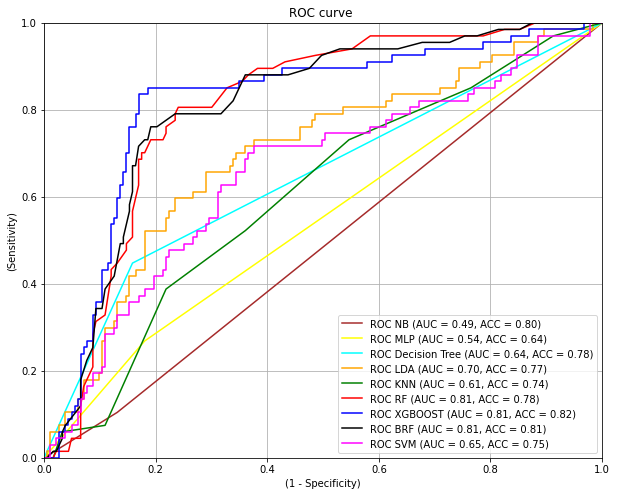

The predictive power of each model expressed by ROC curves. For instance, Linear Discriminant Analysis and XGBOOST model has        higher probability of accurate prediction of correct class member, and gaining high level of accuracy prediction probability        as compared to Random Forest, KNN, Naive Bayes, Neural Network and SVM models.


In [545]:
#Comparing the models
fpr9, tpr9, thresholds9 = roc_curve(y_test, nb_y_predicted)
roc_auc9 = auc(fpr9, tpr9)

fpr8, tpr8, thresholds8 = roc_curve(y_test, mlp_y_predicted)
roc_auc8 = auc(fpr8, tpr8)

fpr7, tpr7, thresholds7 = roc_curve(y_test, DT_y_predicted)
roc_auc7 = auc(fpr7, tpr7)

fpr6, tpr6, thresholds6 = roc_curve(y_test, lda_pred_prob)
roc_auc6 = auc(fpr6, tpr6)

fpr5, tpr5, thresholds5 = roc_curve(y_test, knn_pred_prob)
roc_auc5 = auc(fpr5, tpr5)

fpr4, tpr4, thresholds4 = roc_curve(y_test, rf_pred_prob)
roc_auc4 = auc(fpr4, tpr4)

fpr3, tpr3, thresholds3 = roc_curve(y_test, xgb_pred_prob)
roc_auc3 = auc(fpr3, tpr3)

fpr2, tpr2, thresholds2 = roc_curve(y_test, brf_pred_prob)
roc_auc2 = auc(fpr2, tpr2)

fpr1, tpr1, thresholds1 = roc_curve(y_test,svm_pred_prob)
roc_auc1 = auc(fpr1, tpr1)
lw = 2
plt.figure(figsize=(10, 8))
plt.plot(fpr9, tpr9,color='brown',label='ROC NB (AUC = %0.2f, ACC = %0.2f)' % (roc_auc9, nb_accuracy))
plt.plot(fpr8, tpr8,color='yellow',label='ROC MLP (AUC = %0.2f, ACC = %0.2f)' % (roc_auc8, mlp_accuracy))
plt.plot(fpr7, tpr7,color='cyan',label='ROC Decision Tree (AUC = %0.2f, ACC = %0.2f)' % (roc_auc7, dt_accuracy))
plt.plot(fpr6, tpr6,color='orange',label='ROC LDA (AUC = %0.2f, ACC = %0.2f)' % (roc_auc6, lda_accuracy))
plt.plot(fpr5, tpr5,color='green',label='ROC KNN (AUC = %0.2f, ACC = %0.2f)' % (roc_auc5, knn_accuracy))
plt.plot(fpr4, tpr4,color='red',label='ROC RF (AUC = %0.2f, ACC = %0.2f)' % (roc_auc4, rf_accuracy))
plt.plot(fpr3, tpr3,color='blue',label='ROC XGBOOST (AUC = %0.2f, ACC = %0.2f)' % (roc_auc3, xgb_accuracy))
plt.plot(fpr2, tpr2,color='black',label='ROC BRF (AUC = %0.2f, ACC = %0.2f)' % (roc_auc2, brf_accuracy))
plt.plot(fpr1, tpr1,color='magenta',label='ROC SVM (AUC = %0.2f, ACC = %0.2f)' % (roc_auc1, svm_accuracy))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve ')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

print("The predictive power of each model expressed by ROC curves. For instance, Linear Discriminant Analysis and XGBOOST model has\
        higher probability of accurate prediction of correct class member, and gaining high level of accuracy prediction probability\
        as compared to Random Forest, KNN, Naive Bayes, Neural Network and SVM models.")

In [558]:
#XGBOOST model has better ROC Curve and Cross-validated accuracy, plot feature importance
def rf_feat_importance(m):
    return pd.DataFrame({'feature':['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year'], 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
def plot_fi(fi): 
    return fi.plot('feature', 'imp', 'barh', figsize=(15,7), legend=False)

fi = rf_feat_importance(clf_MLP); fi[:15]

AttributeError: 'MLPClassifier' object has no attribute 'feature_importances_'

In [553]:
dict(fi[:10].values.tolist())

{'incident_severity': 0.2118217796087265,
 'insured_hobbies': 0.10392586886882782,
 'number_of_vehicles_involved': 0.03750027343630791,
 'auto_year': 0.032660696655511856,
 'policy_annual_premium': 0.03260771557688713,
 'incident_hour_of_the_day': 0.03184943646192551,
 'insured_sex': 0.03017924726009369,
 'collision_type': 0.028920751065015793,
 'capital-loss': 0.027938710525631905,
 'incident_city': 0.025643933564424515}

In [548]:
type(x.columns)

pandas.core.indexes.base.Index

<AxesSubplot:ylabel='feature'>

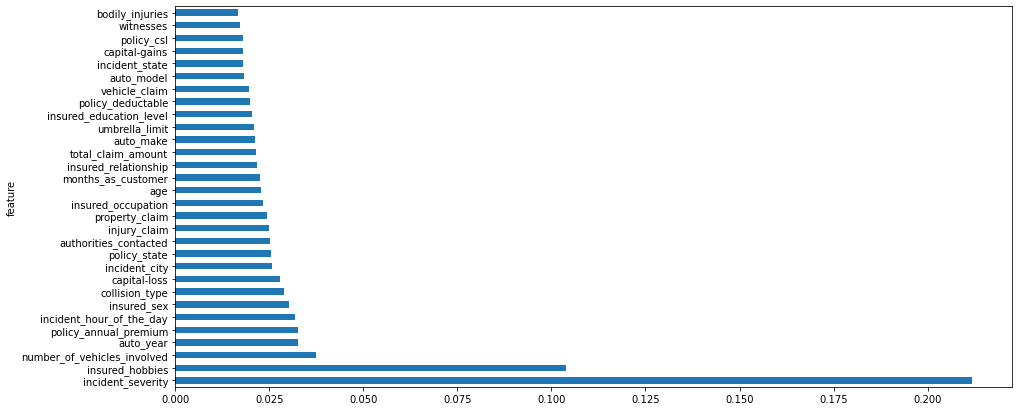

In [183]:
plot_fi(fi[:30])

## Dumping Models

In [101]:
import joblib

In [255]:
# Save to file in the current working directory
#xgboost

joblib_file = "xgboost_jl.pkl"
joblib.dump(model_xgb, open(joblib_file,'wb'))

In [59]:
# Save to file in the current working directory
#balanced random forest

joblib_file = "balancedrf_jl.pkl"
joblib.dump(BRFClassifier, open(joblib_file,'wb'))

In [557]:
# Save to file in the current working directory
#linear discriminant analysis

joblib_file = "lda_jl.pkl"
joblib.dump(lda, open(joblib_file,'wb'))

In [559]:
# Save to file in the current working directory
#decisionTree

joblib_file = "gbm_jl.pkl"
joblib.dump(DTClassifier, open(joblib_file,'wb'))

In [105]:
# Save to file in the current working directory
#naivebayes

joblib_file = "naivebayes.pkl"
joblib.dump(NBClassifier, open(joblib_file,'wb'))

In [271]:
# Save to file in the current working directory
#standardscalar

joblib_file = "standardscalar.pkl"
joblib.dump(ss, open(joblib_file,'wb'))

In [403]:
import dill
with open('explainer_dll', 'wb') as f:
    dill.dump(explainer, f)